In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load data
df = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/nhaban_eng.csv")

df_columns = df.columns.tolist() 
print("+ Shape: ", df.shape) # (Number of Lines, Number of Columns)
print("+ Column: ", df_columns) # Name the attribute columns.
df.info()

+ Shape:  (28656, 34)
+ Column:  ['Đường/Phố', 'Phường/Xã', 'Quận/Huyện', 'Phân loại quận', 'Loại tin', 'Mã tin', 'Diện tích', 'Mức giá', 'Mặt tiền', 'Đường vào', 'Hướng ban công', 'Hướng nhà', 'Số tầng', 'Số phòng ngủ', 'Số toilet', 'Pháp lý', 'Nội thất', 'Loại hình', 'Nhóm 1-Trường học', 'Nhóm 1- Chợ/Siêu thị', 'Nhóm 1-Bệnh viện', 'Công viên', 'Loại ngõ', 'Vỉa hè', 'Bán gấp', 'Sân phơi', 'Nhà thoáng', 'Gần hồ', 'An ninh', 'Hiện đại', 'Chỗ để xe', 'Thang máy', 'Lô góc', 'Hỗ trợ vay']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28656 entries, 0 to 28655
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Đường/Phố             25378 non-null  object 
 1   Phường/Xã             28456 non-null  object 
 2   Quận/Huyện            28656 non-null  object 
 3   Phân loại quận        28656 non-null  object 
 4   Loại tin              28656 non-null  object 
 5   Mã tin                28656 non-null  i

In [3]:
df

,Đường/Phố,Phường/Xã,Quận/Huyện,Phân loại quận,Loại tin,Mã tin,Diện tích,Mức giá,Mặt tiền,Đường vào,...,Bán gấp,Sân phơi,Nhà thoáng,Gần hồ,An ninh,Hiện đại,Chỗ để xe,Thang máy,Lô góc,Hỗ trợ vay
0,Tố Hữu,Dương Nội,Hà Đông,Nội thành,Tin thường,39159568,50.0,186.0,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
1,Tố Hữu,La Khê,Hà Đông,Nội thành,Tin thường,38451107,264.0,126.9,NaN,NaN,...,0,0,1,0,0,1,1,0,0,0
2,Đại lộ Thăng Long,An Thượng,Hoài Đức,Ngoại thành,Tin thường,39204669,99.0,121.2,5.00,15.0,...,0,0,0,0,1,0,0,0,1,0
3,Cầu Cốc,Tây Mỗ,Nam Từ Liêm,Nội thành,Tin thường,39214622,30.0,113.3,3.54,2.0,...,0,0,0,0,0,0,0,0,0,0
4,Hoàng Hoa Thám,Liễu Giai,Ba Đình,Nội thành,Tin thường,38856881,90.0,305.6,5.20,10.0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,Tây Sơn,Yết Kiêu,Hà Đông,Nội thành,Tin thường,39229326,40.9,216.6,5.00,NaN,...,0,0,0,0,0,1,0,0,0,0
28652,Hoàng Cầu,Ô Chợ Dừa,Đống Đa,Nội thành,Tin thường,38672743,220.0,409.1,8.50,NaN,...,0,0,0,1,0,1,1,0,0,0
28653,Tôn Đức Thắng,Quốc Tử Giám,Đống Đa,Nội thành,Tin thường,39203647,46.0,571.7,NaN,NaN,...,0,1,1,0,0,0,0,0,1,0
28654,Đồng Cổ,Bưởi,Tây Hồ,Nội thành,Tin thường,35029152,51.0,205.9,7.50,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()/df.shape[0] * 100.00

Đường/Phố               11.439140
Phường/Xã                0.697934
Quận/Huyện               0.000000
Phân loại quận           0.000000
Loại tin                 0.000000
Mã tin                   0.000000
Diện tích                0.000000
Mức giá                  0.000000
Mặt tiền                35.975014
Đường vào               52.372976
Hướng ban công          87.461614
Hướng nhà               79.609855
Số tầng                 17.211055
Số phòng ngủ            33.232133
Số toilet               39.977666
Pháp lý                  0.000000
Nội thất                 0.000000
Loại hình                0.000000
Nhóm 1-Trường học        0.000000
Nhóm 1- Chợ/Siêu thị     0.000000
Nhóm 1-Bệnh viện         0.000000
Công viên                0.000000
Loại ngõ                79.107342
Vỉa hè                   0.000000
Bán gấp                  0.000000
Sân phơi                 0.000000
Nhà thoáng               0.000000
Gần hồ                   0.000000
An ninh                  0.000000
Hiện đại      

In [5]:
columns_to_drop = ['Loại tin', 'Mã tin', 'Hướng nhà', 'Hướng ban công', 'Nội thất', 'Loại ngõ', 'Loại hình']
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28656 entries, 0 to 28655
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Đường/Phố             25378 non-null  object 
 1   Phường/Xã             28456 non-null  object 
 2   Quận/Huyện            28656 non-null  object 
 3   Phân loại quận        28656 non-null  object 
 4   Diện tích             28656 non-null  float64
 5   Mức giá               28656 non-null  object 
 6   Mặt tiền              18347 non-null  float64
 7   Đường vào             13648 non-null  float64
 8   Số tầng               23724 non-null  float64
 9   Số phòng ngủ          19133 non-null  float64
 10  Số toilet             17200 non-null  float64
 11  Pháp lý               28656 non-null  object 
 12  Nhóm 1-Trường học     28656 non-null  int64  
 13  Nhóm 1- Chợ/Siêu thị  28656 non-null  int64  
 14  Nhóm 1-Bệnh viện      28656 non-null  int64  
 15  Công viên          

In [6]:
# Fill NaN
df['Phường/Xã'].fillna(df['Phường/Xã'].mode()[0], inplace=True)
df['Đường/Phố'].fillna(df['Đường/Phố'].mode()[0], inplace=True)

phuongloai_mapping = {'Nội thành': 1, 'Ngoại thành': 0}
df['Phân loại quận'] = df['Phân loại quận'].map(phuongloai_mapping)

numeric_cols = ['Số phòng ngủ', 'Số toilet']
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# One-Hot Encoding 
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['Quận/Huyện']]).toarray()
onehot_encoded_df = pd.DataFrame(onehot_encoded, 
                                 columns=onehot_encoder.get_feature_names_out(['Quận/Huyện']), 
                                 dtype=bool)
onehot_encoded_df = onehot_encoded_df * 1

onehot_encoder_phap_ly = OneHotEncoder()
phap_ly_encoded = onehot_encoder_phap_ly.fit_transform(df[['Pháp lý']]).toarray()
phap_ly_encoded_df = pd.DataFrame(phap_ly_encoded, 
                                  columns=onehot_encoder_phap_ly.get_feature_names_out(['Pháp lý']), 
                                  dtype=bool)
phap_ly_encoded_df = phap_ly_encoded_df * 1

df = pd.concat([df, onehot_encoded_df], axis=1)
df.drop(columns=['Quận/Huyện'], inplace=True)

df = pd.concat([df, phap_ly_encoded_df], axis=1)
df.drop(columns=['Pháp lý'], inplace=True)

# Label Encoding 
label_encoder_px = LabelEncoder()
df['Phường/Xã'] = label_encoder_px.fit_transform(df['Phường/Xã'].str.replace("Phường ", ""))
df['Đường/Phố'] = label_encoder_px.fit_transform(df['Đường/Phố'].str.replace("Đường ", ""))

# print(df)

In [7]:
df.isnull().sum()/df.shape[0] * 100.00

Đường/Phố                                 0.0
Phường/Xã                                 0.0
Phân loại quận                            0.0
Diện tích                                 0.0
Mức giá                                   0.0
                                         ... 
Pháp lý_Khác                              0.0
Pháp lý_Sổ chung                          0.0
Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ    0.0
Pháp lý_Vi bằng                           0.0
Pháp lý_Đang chờ sổ                       0.0
Length: 61, dtype: float64

In [8]:
df

,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số phòng ngủ,Số toilet,...,Quận/Huyện_Đan Phượng,Quận/Huyện_Đông Anh,Quận/Huyện_Đống Đa,Quận/Huyện_Ứng Hòa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Vi bằng,Pháp lý_Đang chờ sổ
0,1009,42,1,50.0,186.0,NaN,NaN,5.0,5.798098,5.755581,...,0,0,0,0,0,0,0,1,0,0
1,1009,105,1,264.0,126.9,NaN,NaN,4.0,5.000000,6.000000,...,0,0,0,0,0,0,0,1,0,0
2,1192,1,0,99.0,121.2,5.00,15.0,4.0,4.000000,4.000000,...,0,0,0,0,0,1,0,0,0,0
3,151,279,1,30.0,113.3,3.54,2.0,5.0,3.000000,4.000000,...,0,0,0,0,0,0,0,1,0,0
4,254,114,1,90.0,305.6,5.20,10.0,5.0,6.000000,6.000000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,979,324,1,40.9,216.6,5.00,NaN,5.0,3.000000,4.000000,...,0,0,0,0,0,0,0,1,0,0
28652,252,325,1,220.0,409.1,8.50,NaN,8.0,5.798098,5.755581,...,0,0,1,0,0,0,0,1,0,0
28653,992,208,1,46.0,571.7,NaN,NaN,4.0,3.000000,4.000000,...,0,0,1,0,0,0,0,1,0,0
28654,1212,11,1,51.0,205.9,7.50,NaN,4.0,4.000000,3.000000,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Remove rows with "Thỏa thuận" price
df_processed = df[df['Mức giá'] != 'Thỏa thuận'].copy()

# Select features and target columns
X = df_processed.drop(columns=['Mức giá'])
y = df_processed['Mức giá'].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(22953, 60) (22953,) (2551, 60) (2551,)


In [10]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict prices for rows with "Thỏa thuận" price
df_thoa_thuan = df[df['Mức giá'] == 'Thỏa thuận']
X_thoa_thuan = df_thoa_thuan.drop(columns=['Mức giá'])

# Predict prices
predicted_prices = model.predict(X_thoa_thuan)

In [11]:
# Replace "Thỏa thuận" prices with predicted values
df.loc[df['Mức giá'] == 'Thỏa thuận', 'Mức giá'] = predicted_prices

df

,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số phòng ngủ,Số toilet,...,Quận/Huyện_Đan Phượng,Quận/Huyện_Đông Anh,Quận/Huyện_Đống Đa,Quận/Huyện_Ứng Hòa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Vi bằng,Pháp lý_Đang chờ sổ
0,1009,42,1,50.0,186.0,NaN,NaN,5.0,5.798098,5.755581,...,0,0,0,0,0,0,0,1,0,0
1,1009,105,1,264.0,126.9,NaN,NaN,4.0,5.000000,6.000000,...,0,0,0,0,0,0,0,1,0,0
2,1192,1,0,99.0,121.2,5.00,15.0,4.0,4.000000,4.000000,...,0,0,0,0,0,1,0,0,0,0
3,151,279,1,30.0,113.3,3.54,2.0,5.0,3.000000,4.000000,...,0,0,0,0,0,0,0,1,0,0
4,254,114,1,90.0,305.6,5.20,10.0,5.0,6.000000,6.000000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,979,324,1,40.9,216.6,5.00,NaN,5.0,3.000000,4.000000,...,0,0,0,0,0,0,0,1,0,0
28652,252,325,1,220.0,409.1,8.50,NaN,8.0,5.798098,5.755581,...,0,0,1,0,0,0,0,1,0,0
28653,992,208,1,46.0,571.7,NaN,NaN,4.0,3.000000,4.000000,...,0,0,1,0,0,0,0,1,0,0
28654,1212,11,1,51.0,205.9,7.50,NaN,4.0,4.000000,3.000000,...,0,0,0,0,0,0,0,1,0,0


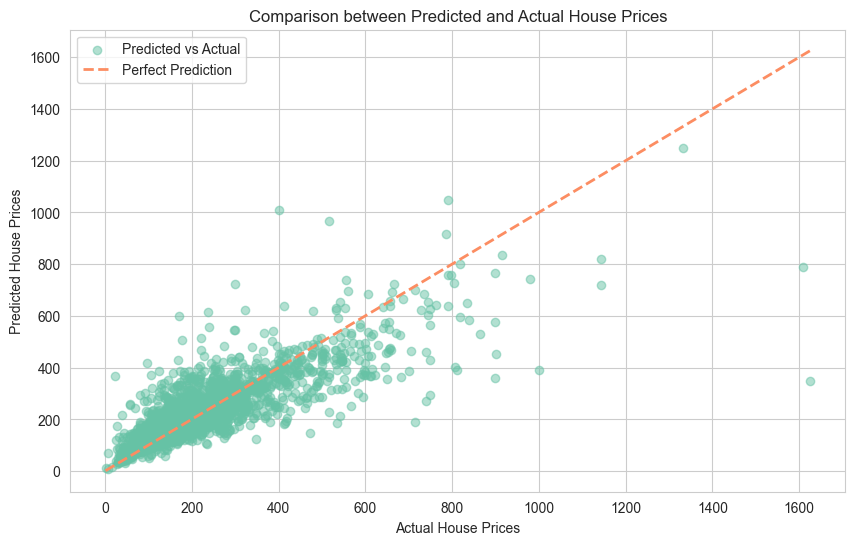

In [12]:
# Predict house prices
predicted_prices = model.predict(X_test)

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()

In [13]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_prices)

# Calculate R^2 score
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

RMSE: 84.48054202971288
MAE: 49.301214105758994
R^2: 0.6813282330846127


Tuning

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 86.98270048710827
MAE: 51.06366101419922
R^2: 0.6621717382530778


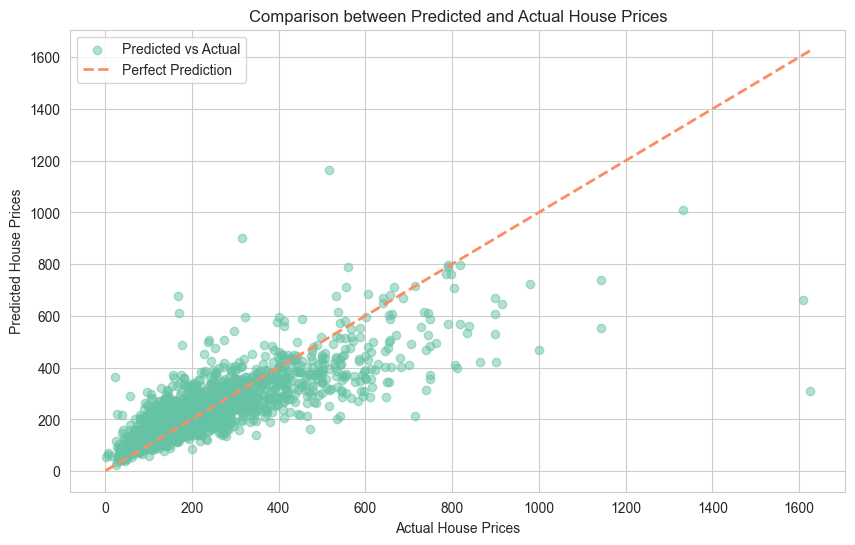

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict house prices using the best model
predicted_prices = best_model.predict(X_test)

# Calculate RMSE, MAE, and R^2
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
mae = mean_absolute_error(y_test, predicted_prices)
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()